In [1]:
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model
from keras.initializers import glorot_uniform
import os
import datetime
import re
import numpy as np
from tensorflow.keras.models import load_model
from keras.initializers import glorot_uniform
import numpy as np

Using TensorFlow backend.


In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
now_datetime  = datetime.datetime.now()
NAME = f"#Results_{now_datetime.day:02d}{now_datetime.month:02d}{now_datetime.year}_{now_datetime.hour:02d}{now_datetime.minute:02d}"


In [3]:
#directory containing the serilized databases, that has the test folder in it
dir_pickle = "database_serialized"

#directory for storing the results of the experiments
dir_results = "results"

#where to find the models
dir_models_save = "models"

#Size of the batch
batch_size = 3

In [4]:
def evaluete_model(person,model_name,Xtest,ytest, my_file=None,shape="NoNInformed",show_examples=False):
    #Normalize data
    Xtest_norm = Xtest.astype(np.float16)/255.0
    #Evaluetes the model base on the test
    custom_objects={'GlorotUniform': glorot_uniform()}
    saved_model = load_model(os.path.join(dir_models_save,person,model_name),custom_objects)
    results = saved_model.evaluate(Xtest_norm,ytest,batch_size=batch_size)
    if show_examples:
        predict_random(Xtest,ytest,saved_model,Xtest_norm)
    
    person = re.findall("\d+#",model_name)
    if my_file is not None:
        my_file.write(f"Model of shape: {shape}\n\
            \t->Acc= {results[1]}\n")
    return results

In [5]:
def predict_random(Xtest,ytest,saved_model,Xtest_norm):
    import matplotlib.pyplot as plt
    import cv2
    %matplotlib inline
    a = saved_model.predict(Xtest_norm,batch_size=batch_size)
    plt.figure(figsize=(10,10))
    a_round = np.round(a)
    nrows = 4
    ncols = 4
    start = 25
    Xtest_sample = Xtest[start:start +nrows*ncols]
    i = start
    for img in Xtest_sample:
        plt.subplot(nrows,ncols,i-start+1)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Pred:[{int(a_round[i])}] | Real:({ytest[i]})")
        i += 1
    plt.show()

Evaluating: _All
3952/3952 [==============================] - 44s 11ms/sample - loss: 1.6102 - acc: 0.8279


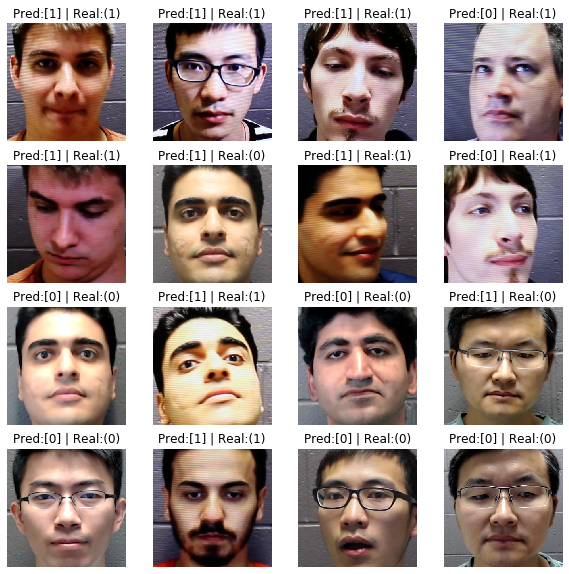

[1.610168228129977, 0.8279352]

In [6]:
model_tag = "_All"
model_name = "_All#Face_spoofing300x2_17102019_0301[80, 120, 300][400].h5"
print(f"Evaluating: {model_tag}")       
pickle_in = open(os.path.join(dir_pickle,model_tag,f"X{model_tag}Test.pickle"),"rb")
Xtest = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open(os.path.join(dir_pickle,model_tag,f"y{model_tag}Test.pickle"),"rb")
ytest = pickle.load(pickle_in)
pickle_in.close()
evaluete_model(model_tag,model_name,Xtest,ytest,show_examples=True)
